In [4]:
import RPi.GPIO as GPIO
import numpy as np
import math

GPIO.setwarnings(False)
GPIO.setmode(GPIO.BCM)

In [5]:
pins = [17, 27, 22, 10, 9]

for pin in pins:
    GPIO.setup(pin, GPIO.OUT)
    GPIO.output(pin, GPIO.LOW)

In [6]:
def on(pin):
    GPIO.output(pin, GPIO.HIGH)
     
def off(pin):
    GPIO.output(pin, GPIO.LOW)    

In [7]:
from time import sleep

for pin in pins:
    on(pin)
    sleep(1)

In [8]:
values = [10, 50, 100, 20, 10]
maximum = np.max(values)
lights = []
number_of_lights = len(pins)
for value in values:
    lights.append(np.interp(value, [0,maximum], [0,number_of_lights]))
lights

[0.5, 2.5, 5.0, 1.0, 0.5]

In [45]:
for light in lights:
    for index in range(0, math.ceil(light)):
        on(pins[index])
    sleep(0.25)
    for pin in pins:
        off(pin)
        
    

In [2]:
import pandas as pd
data = pd.read_table('sensorlog_overnight.csv', sep=' , ', engine='python', parse_dates=['TimeStamp'])

In [11]:
data['Light'].max()

65535

In [15]:
maximum = data['Light'].max()
total_LEDs = len(pins)

for measurement in data['Light']:
    level = np.interp(measurement, [0,maximum], [0,total_LEDs])
    for index in range(0, math.floor(level)):
        on(pins[index])
    sleep(0.02)
    for pin in pins:
        off(pin)

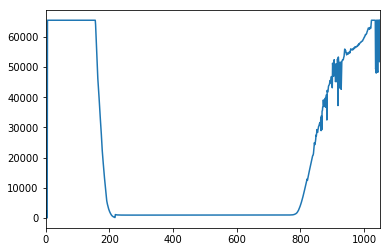

In [11]:
data['Light'].plot()